Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

#### How it Works

For each feature, Fisher's Score is calculated as the ratio of the between-class variance to the within-class variance:

##### Fisher's Score = (Between-Class Variance) / (Within-Class Variance)
###### Between-Class Variance: Measures how much the feature values differ between different classes. A higher value indicates better separation between classes.
###### Within-Class Variance: Measures how spread out the feature values are within each class. A lower value indicates that the feature values are tightly clustered within each class.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, SelectPercentile

In [4]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [9]:
def fisher_score(X, y):
    class_labels = np.unique(y)
    num_features = X.shape[1]
    scores = np.zeros(num_features)

    for i in range(num_features):
        feature_values = X[:, i]
        class_means = np.array([feature_values[y == c].mean() for c in class_labels])
        class_variances = np.array([feature_values[y == c].var() for c in class_labels])
        
        # Check for zero variance to avoid division by zero
        within_class_var = np.sum(class_variances * [np.sum(y == c) for c in class_labels])
        if within_class_var == 0:
            scores[i] = 0  # Or handle it in a different way based on your needs
        else:
            between_class_var = np.sum(((class_means - feature_values.mean())**2) * [np.sum(y == c) for c in class_labels])
            scores[i] = between_class_var / within_class_var

    return scores


In [10]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [11]:
# Store original column names
original_columns = X.columns

In [12]:
# Calculate the information gain for each feature
selector = SelectPercentile(fisher_score, percentile=80)

In [16]:
X_new = selector.fit_transform(X, y)
X_new

array([[9.10801085e-02, 3.28100623e-01, 2.39987184e-01, ...,
        1.61511741e-03, 8.34394467e-02, 8.12283770e-02],
       [6.24611449e-01, 2.45482029e-01, 2.88849728e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.22643876e-02, 8.43429254e-02, 4.46651714e-01, ...,
        2.10855204e-02, 8.35312557e-02, 4.33562178e-02],
       ...,
       [1.64478816e-01, 8.65994849e-01, 3.00384492e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.48365591e-01, 3.60295600e-01, 2.47997437e-01, ...,
        6.46850964e-04, 4.84613516e-01, 4.84111914e-01],
       [9.63346961e-02, 9.13298250e-01, 3.37071451e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [17]:
# Get the selected feature names
selected_features = original_columns[selector.get_support()]


In [18]:
# Identify dropped columns
dropped_columns = original_columns.difference(selected_features)

print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
Index(['Bwd Header Len', 'Bwd IAT Std', 'FIN Flag Cnt', 'Fwd Act Data Pkts',
       'Fwd Header Len', 'Init Bwd Win Byts', 'Subflow Bwd Byts',
       'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Fwd Pkts',
       'Tot Bwd Pkts', 'Tot Fwd Pkts', 'TotLen Bwd Pkts', 'TotLen Fwd Pkts',
       'Unnamed: 0.1', 'Unnamed: 0.2'],
      dtype='object')


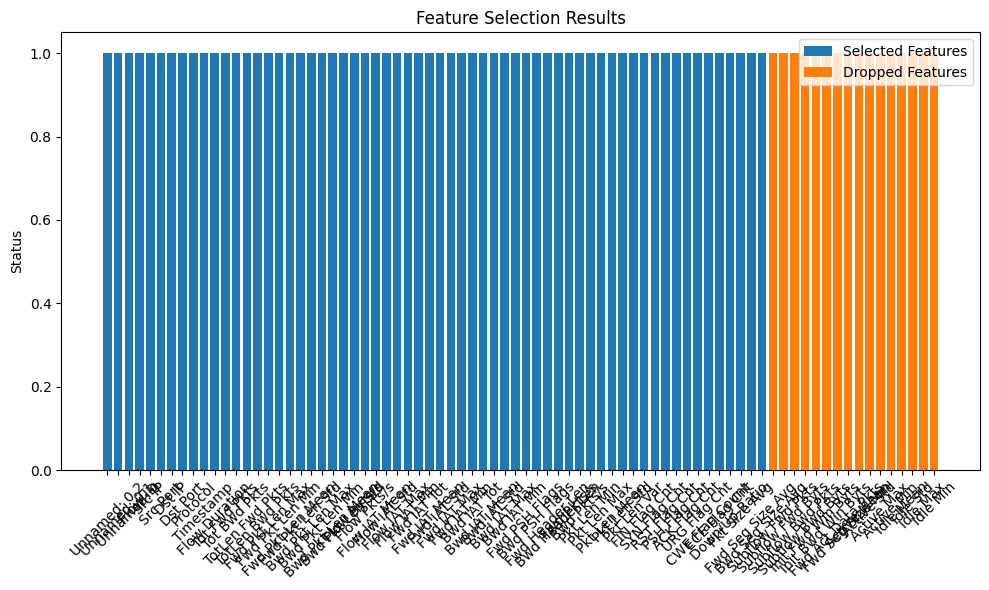

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), np.ones(len(selected_features)), label='Selected Features')
plt.bar(range(len(selected_features), len(original_columns)), np.ones(len(dropped_columns)), label='Dropped Features')
plt.xticks(range(len(original_columns)), original_columns, rotation=45)
plt.ylabel('Status')
plt.title('Feature Selection Results')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Assuming 'X_new' is your transformed data and 'X' is your original DataFrame
df_selected = pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

(df_selected)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Fwd Pkt Len Max,...,Init Fwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.504694,0.044461,...,0.125015,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228
1,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000015,0.003574,...,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.967061,0.162304,...,0.000000,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356
3,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.036977,0.077703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.015704,0.056262,...,0.125015,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000320,0.077703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172005,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000113,0.002493,...,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172006,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000010,0.077703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172007,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.976377,0.016289,...,0.125015,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112


In [21]:
df_selected.to_csv("FishersScore.csv")